In [4]:
#!pip install deepface

In [5]:
import os
import sys
from deepface import DeepFace
from PIL import Image, ImageDraw
from IPython.display import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
sys.path.append('aux_scripts.py')

Define the folder and image name

Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]  


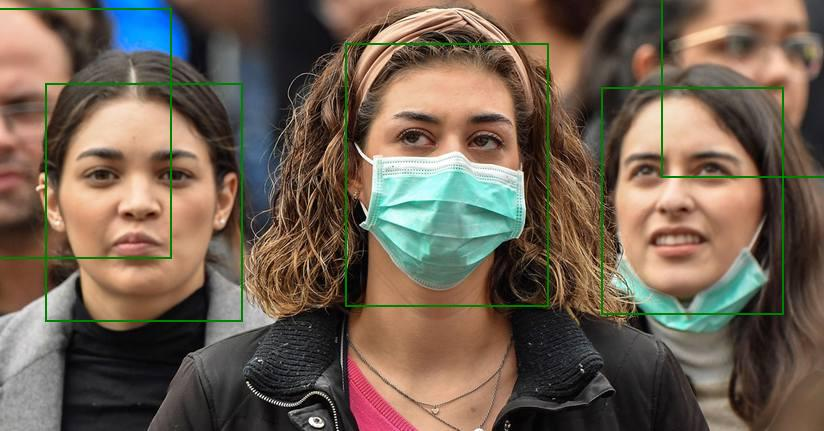

Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]  


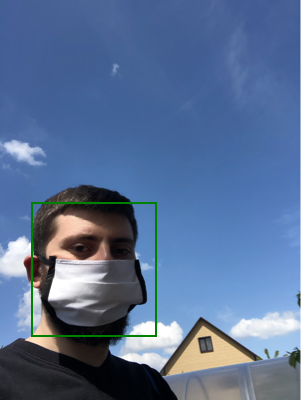

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]  


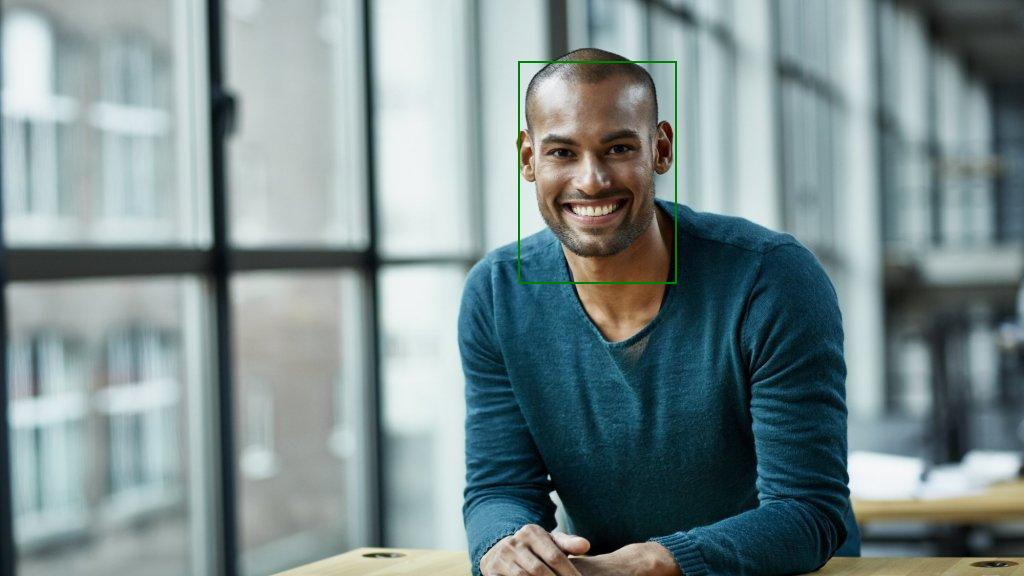

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.66it/s]  


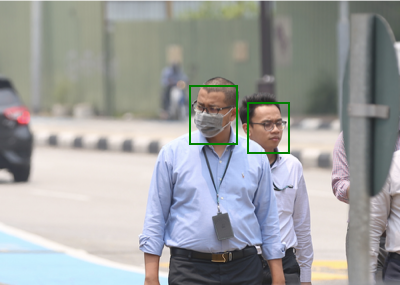

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]  


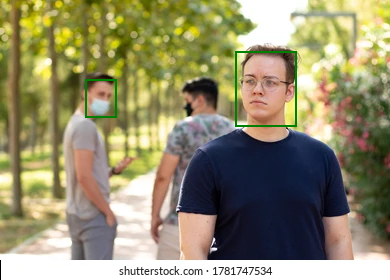

Action: race: 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]  


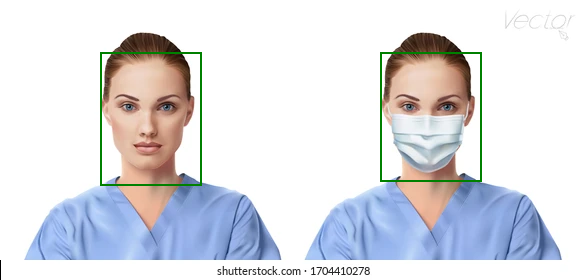

Action: race: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]  


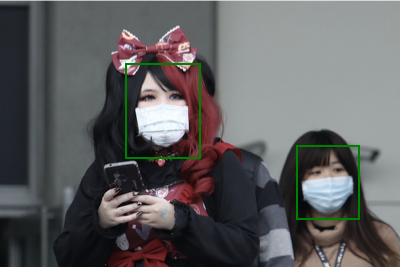

In [6]:
folder_name = "../dataset/images/original/"
modified_folder_name = "../dataset/images/processed/"
cropped_folder_name = "../dataset/images/cropped/"

# Create the processed and cropped folders if they don't exist
os.makedirs(modified_folder_name, exist_ok=True)
os.makedirs(cropped_folder_name, exist_ok=True)

for image_name in os.listdir(folder_name):
    # Only process if the file is an image (e.g., PNG, JPG)
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Load image
        image_path = os.path.join(folder_name, image_name)
        image = Image.open(image_path)

        # Analyze the image
        analysis = DeepFace.analyze(img_path=image_path, detector_backend='retinaface', enforce_detection=False)
        
        # Draw bounding boxes for each face detected
        draw = ImageDraw.Draw(image)
        for idx, item in enumerate(analysis):
            region = item['region']
            x, y, w, h = region['x'], region['y'], region['w'], region['h']

            offset_x = 0.2
            offset_y = 0.15

            # Crop the detected face
            cropped_face = image.crop((x-((w*offset_x)/2), y-((h*offset_y)/2), x + w + w*offset_x, y + h + h*offset_y))
            cropped_face_path = os.path.join(cropped_folder_name, f"{image_name}_face_{idx + 1}.png")
            cropped_face.save(cropped_face_path)
            #print(f"Cropped face saved as {cropped_face_path}")

            # Draw rectangle on the original image
            width_line = 2
            draw.rectangle([(x-((w*offset_x)/2), y-((h*offset_y)/2)), (x + w + w*offset_x, y + h + h*offset_y)], outline='green', width=width_line)

        # Save the image with bounding boxes
        modified_image_path = os.path.join(modified_folder_name, "MOD_" + image_name)
        image.save(modified_image_path)
        
        # Optionally, display the processed image
        modified_image = Image.open(modified_image_path)
        display(modified_image)
